In [1]:
import numpy as np
import matplotlib.pyplot as plt

rarity = ["Common", "Rare", "Epic", "Legendary"]
nSetCommon = np.array([23, 9, 9, 12])
nSetClass = np.array([3,3,2,1])
nSlots = np.array([2,2,2,1])
nSet1Card = lambda nClass : nSetCommon + nSetClass * nClass
nSetCollection = lambda _nSet1Card : nSlots * _nSet1Card
nCardsPerPack = 5

nDustSell = np.array([5,20,100,400])
nDustBuy = np.array([40,100,400,1600])
freq = np.array([71.62, 22.85, 4.43, 1.10])
freq /= np.sum(freq)
distr = lambda n : np.random.multinomial(n, freq)

In [2]:
def calc_dust_excess(collection):
    rez = 0
    for iRarity in range(4):
        tmp = collection[iRarity] - nSlots[iRarity]
        rez += nDustSell[iRarity] * np.sum(tmp[tmp > 0])
    return rez

def calc_dust_missing(collection):
    rez = 0
    for iRarity in range(4):
        tmp = collection[iRarity] - nSlots[iRarity]
        rez += nDustBuy[iRarity] * np.abs(np.sum(tmp[tmp < 0]))
    return rez



def n_packs_full_collection_before(_nSet1Card):
    collection = [np.zeros(nCard) for nCard in _nSet1Card]

    iPacks = 0
    while calc_dust_excess(collection) < calc_dust_missing(collection):
        iPacks += 1
        nThisPack = distr(nCardsPerPack)
        for iRarity in range(4):
            if nThisPack[iRarity] > 0:
                cardIdxs = np.random.randint(0, _nSet1Card[iRarity], nThisPack[iRarity])
                collection[iRarity][cardIdxs] += 1

    return collection, iPacks

def n_packs_full_collection_after(_nSet1Card):
    _nSetCollection = nSetCollection(_nSet1Card)
    
    collection = [np.zeros(nCard) for nCard in _nSet1Card]

    iPacks = 0
    while calc_dust_excess(collection) < calc_dust_missing(collection):
        iPacks += 1
        nThisPack = distr(nCardsPerPack)
        for iRarity in range(4):
            while nThisPack[iRarity] > 0:
                # If we have reached saturation, gain random cards of this rarity
                if np.sum(collection[iRarity]) >= _nSetCollection[iRarity]:      
                    cardIdxs = np.random.randint(0, _nSet1Card[iRarity], nThisPack[iRarity])
                    collection[iRarity][cardIdxs] += 1
                    nThisPack[iRarity] = 0
                # Otherwise saturate incrementally
                else:
                    idxThis = np.where(collection[iRarity] < nSlots[iRarity])[0][0]
                    collection[iRarity][idxThis] += 1
                    nThisPack[iRarity] -= 1

    return collection, iPacks

In [4]:
nClass = 9
nSet1CardThis = nSet1Card(nClass)

nSample = 1000
dataBefore = [n_packs_full_collection_before(nSet1CardThis)[1] for i in range(nSample)]
dataAfter = [n_packs_full_collection_after(nSet1CardThis)[1] for i in range(nSample)]

Before 339.629
After 281.753


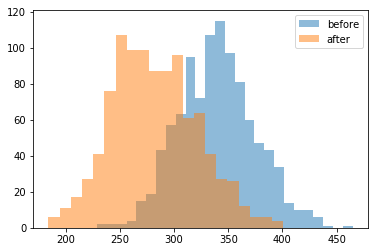

In [7]:
print("Before", np.mean(dataBefore))
print("After", np.mean(dataAfter))

plt.figure()
plt.hist(dataBefore, bins='auto', alpha=0.5, label='before')
plt.hist(dataAfter, bins='auto', alpha=0.5, label='after')
plt.legend()
plt.show()

In [8]:
nClass = 10
nSet1CardWOTOG10 = nSet1Card(nClass)

nSample = 1000
dataWOTOG10 = [n_packs_full_collection_after(nSet1CardWOTOG10)[1] for i in range(nSample)]

nSet1CardAOA10 = np.array([52,35,23,24])
dataAOA10 = [n_packs_full_collection_after(nSet1CardAOA10)[1] for i in range(nSample)]

In [11]:
nSet1Card(10)

array([53, 39, 29, 22])

WOTOG - extrapolated to 10 293.175
AOA 302.804


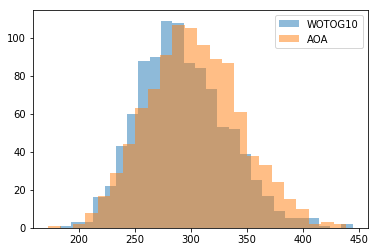

In [9]:
print("WOTOG - extrapolated to 10", np.mean(dataWOTOG10))
print("AOA", np.mean(dataAOA10))

plt.figure()
plt.hist(dataWOTOG10, bins='auto', alpha=0.5, label='WOTOG10')
plt.hist(dataAOA10, bins='auto', alpha=0.5, label='AOA')
plt.legend()
plt.show()

338


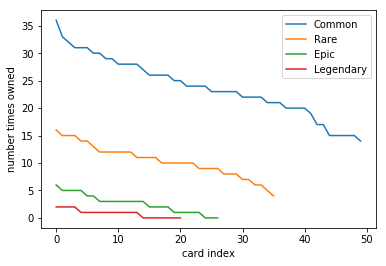

In [12]:
collectionExample, iPacksExample = n_packs_full_collection_before(nSet1CardThis)

print(iPacksExample)

plt.figure()
for c, name in zip(collectionExample, rarity):
    plt.plot(sorted(c)[::-1], label=name)

plt.xlabel("card index")
plt.ylabel("number times owned")
plt.legend()
plt.show()

285


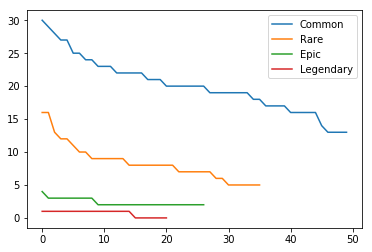

In [14]:
collectionExample, iPacksExample = n_packs_full_collection_after(nSet1CardThis)

print(iPacksExample)

plt.figure()
for c, name in zip(collectionExample, rarity):
    plt.plot(sorted(c)[::-1], label=name)
#     plt.plot(c, label=name)

plt.legend()
plt.show()

342


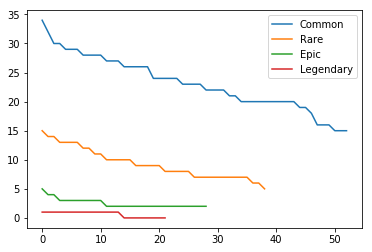

In [15]:
collectionExample, iPacksExample = n_packs_full_collection_after(nSet1CardWOTOG10)

print(iPacksExample)

plt.figure()
for c, name in zip(collectionExample, rarity):
    plt.plot(sorted(c)[::-1], label=name)
#     plt.plot(c, label=name)

plt.legend()
plt.show()

328


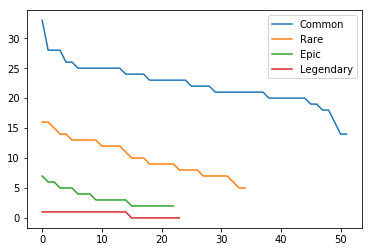

In [21]:
collectionExample, iPacksExample = n_packs_full_collection_after(nSet1CardAOA10)

print(iPacksExample)

plt.figure()
for c, name in zip(collectionExample, rarity):
    plt.plot(sorted(c)[::-1], label=name)
#     plt.plot(c, label=name)

plt.legend()
plt.show()